In [1]:
# %load hovorka.py

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


def model(x, t, t_offset=None):
    w = 100
    ka1 = 0.006  #
    ka2 = 0.06  #
    ka3 = 0.03  #
    kb1 = 0.0034  #
    kb2 = 0.056  #
    kb3 = 0.024  #
    u_b = 0.0555
    tmaxI = 55  #
    VI = 0.12 * w  #
    ke = 0.138  #
    k12 = 0.066  #
    VG = 0.16 * w  #
    # G = x[0] / VG
    F01 = 0.0097 * w  #
    FR = 0
    EGP0 = 0.0161 * w  #
    AG = 0.8  #
    Gmolar = 180.1559
    tmaxG = 40  #
    sp = 110 * VG / 18
    l = (x[14] * x[10] + x[13] * x[11] + x[12] * (-(
            - F01 - x[5] * x[0] + k12 * x[1] - FR + EGP0 * (1 - x[7]) + (x[9] * AG * 1000 / Gmolar) * x[8] * np.exp(
        -x[8] / tmaxG) / (tmaxG ** 2)))) + u_b - x[2] / tmaxI,

    dxdt = [
        - F01 - x[5] * x[0] + k12 * x[1] - FR + EGP0 * (1 - x[7]) + (x[9] * AG * 1000 / Gmolar) * x[8] * np.exp(
            -x[8] / tmaxG) / (tmaxG ** 2),
    x[5] * x[0] - (k12 + x[6]) * x[1],
        ((x[14] * x[10] + x[13] * x[11] + x[12] * (-(
                - F01 - x[5] * x[0] + k12 * x[1] - FR + EGP0 * (1 - x[7]) + (x[9] * AG * 1000 / Gmolar) * x[8] * np.exp(
            -x[8] / tmaxG) / (tmaxG ** 2)))) + u_b - x[2] / tmaxI) + u_b - x[2] / tmaxI,
    (x[2] - x[3]) / tmaxI,
    x[3] / (tmaxI * VI) - ke * x[4],
    - ka1 * x[5] + kb1 * x[4],
    - ka2 * x[6] + kb2 * x[4],
    - ka3 * x[7] + kb3 * x[4],
    1,
    0,
        0 - (- F01 - x[5] * x[0] + k12 * x[1] - FR + EGP0 * (1 - x[7]) + (x[9] * AG * 1000 / Gmolar) * x[8] * np.exp(
            -x[8] / tmaxG) / (tmaxG ** 2)),
    sp - x[0],
    0,
    0,
    0,
    (sp - x[0])**2,
    (x[8] + t_offset)**2 * (sp - x[0])**2
    ]
    return dxdt

In [2]:
w=100
VG = 0.16 * w
sp = 110 * VG / 18
# initial condition

Kd = [0, -0.0602, -0.0573, -0.06002, -0.0624]
Ki = [0, -3.53e-07, -3e-07, -1.17e-07, -7.55e-07]
Kp = [0, -6.17e-04, -6.39e-04, -6.76e-04, -5.42e-04]

i=1
dg1 = np.random.normal(40,10)
dg2 = np.random.normal(90,10)
dg3 = np.random.normal(60,10)

# dg1 = 40
# dg2 = 90
# dg3 = 60

x0 = [97.77, 19.08024, 3.0525, 3.0525, 0.033551, 0.01899, 0.03128, 0.02681, 0.0, dg1, 0.0, 0.0,  Kd[i], Ki[i], Kp[i], 0, 0];


# time points
t_offset=0
t_sleep = 540
t_meal = 300
t = np.arange(0,t_meal,0.2)

y = odeint(model,x0,t,args=(t_offset,))
ytot = y
ttot = t
ystart  = y[-1,:]
ystart[8] = 0
ystart[9] = dg2
y = odeint(model,ystart,t,args=(t_offset,))
ytot = np.vstack([ytot,y])
ttot = np.hstack([ttot,t+ttot[-1]])
ystart  = y[-1,:]
ystart[8] = 0
ystart[9] = dg3
t = np.arange(0,t_meal+t_sleep,0.2)
y = odeint(model,ystart,t,args=(t_offset,))
ytot = np.vstack([ytot,y])
ttot = np.hstack([ttot,t+ttot[-1]])

No handles with labels found to put in legend.


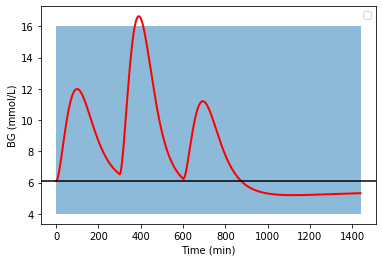

In [3]:
# plot results

plt.fill_between([ttot[0],ttot[-1]], [4,4],[16,16],alpha=0.5)
plt.plot(ttot,ytot[:,0]/VG,'r-',linewidth=2)
plt.axhline(y=sp/VG, color='k', linestyle='-')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.xlabel('Time (min)')
plt.ylabel('BG (mmol/L)')
plt.show()

In [4]:
ttot,ytot[:,0]/VG

(array([0.0000e+00, 2.0000e-01, 4.0000e-01, ..., 1.4390e+03, 1.4392e+03,
        1.4394e+03]),
 array([6.110625  , 6.11078736, 6.11128435, ..., 5.32697491, 5.32705088,
        5.32712682]))